In [1]:
print("Hello, A* Pathfinding!")

Hello, A* Pathfinding!


In [2]:
!pip install numpy matplotlib

Matplotlib is building the font cache; this may take a moment.
C:\Users\akash\AppData\Local\Temp\ipykernel_24352\2869730593.py:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('gray')


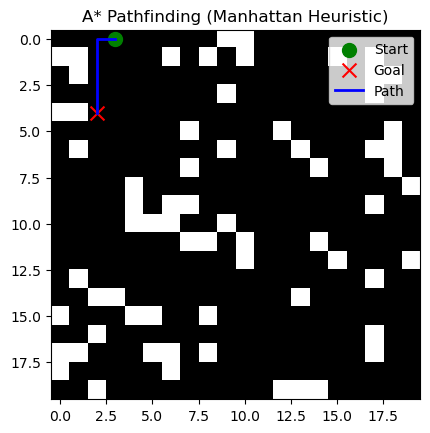

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
import random
from math import sqrt

# Grid settings
GRID_SIZE = 20
OBSTACLE_PROB = 0.2
DIRS = [(-1,0), (1,0), (0,-1), (0,1)]  # Up, down, left, right

# Step 1: Generate grid
def generate_grid(size=GRID_SIZE, obstacle_prob=OBSTACLE_PROB):
    grid = np.zeros((size, size), dtype=int)
    for i in range(size):
        for j in range(size):
            if random.random() < obstacle_prob:
                grid[i][j] = 1  # obstacle
    free = [(i, j) for i in range(size) for j in range(size) if grid[i][j] == 0]
    start, goal = random.sample(free, 2)
    return grid, start, goal

# Step 2: Define heuristics
def manhattan(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

# Step 3: A* Algorithm
def a_star(grid, start, goal, heuristic):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}

    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for dx, dy in DIRS:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
                if grid[neighbor] == 1:
                    continue  # obstacle
                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score = tentative_g + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score, neighbor))
    return None

# Step 4: Visualization
def visualize(grid, start, goal, path):
    cmap = plt.cm.get_cmap('gray')
    plt.imshow(grid, cmap=cmap)
    plt.scatter(start[1], start[0], marker='o', color='green', s=100, label='Start')
    plt.scatter(goal[1], goal[0], marker='x', color='red', s=100, label='Goal')

    if path:
        px = [p[1] for p in path]
        py = [p[0] for p in path]
        plt.plot(px, py, color='blue', linewidth=2, label='Path')

    plt.legend()
    plt.title("A* Pathfinding (Manhattan Heuristic)")
    plt.show()

# ---- Run once to get your first output ----
grid, start, goal = generate_grid()
path = a_star(grid, start, goal, manhattan)
visualize(grid, start, goal, path)


In [4]:
from math import sqrt

# Define all three heuristics
def manhattan(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

def euclidean(a, b):
    return sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def chebyshev(a, b):
    return max(abs(a[0]-b[0]), abs(a[1]-b[1]))


Running Manhattan heuristic...


C:\Users\akash\AppData\Local\Temp\ipykernel_24352\2869730593.py:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('gray')


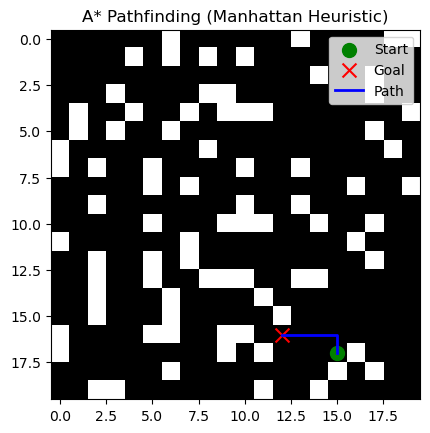

Running Euclidean heuristic...


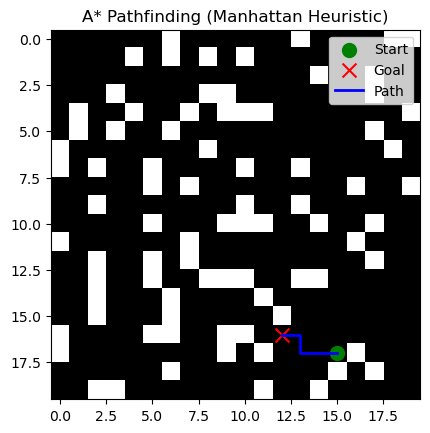

Running Chebyshev heuristic...


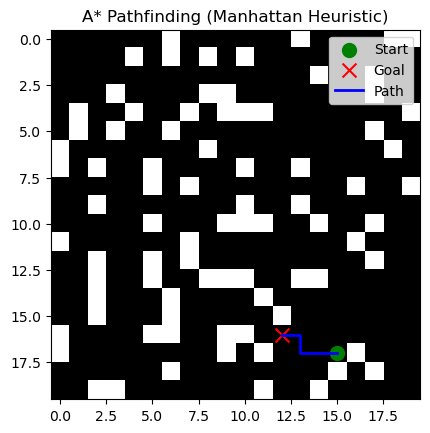

In [5]:
# Generate one random grid
grid, start, goal = generate_grid()

# Run for each heuristic
path_manhattan = a_star(grid, start, goal, manhattan)
path_euclidean = a_star(grid, start, goal, euclidean)
path_chebyshev = a_star(grid, start, goal, chebyshev)

# Visualize each result
print("Running Manhattan heuristic...")
visualize(grid, start, goal, path_manhattan)

print("Running Euclidean heuristic...")
visualize(grid, start, goal, path_euclidean)

print("Running Chebyshev heuristic...")
visualize(grid, start, goal, path_chebyshev)



Heuristic: Manhattan
  Avg Time (s): 0.00088
  Avg Path Length: 17.00
  Avg Nodes Expanded: 57.90

Heuristic: Euclidean
  Avg Time (s): 0.00125
  Avg Path Length: 17.00
  Avg Nodes Expanded: 80.15

Heuristic: Chebyshev
  Avg Time (s): 0.00131
  Avg Path Length: 17.00
  Avg Nodes Expanded: 89.10


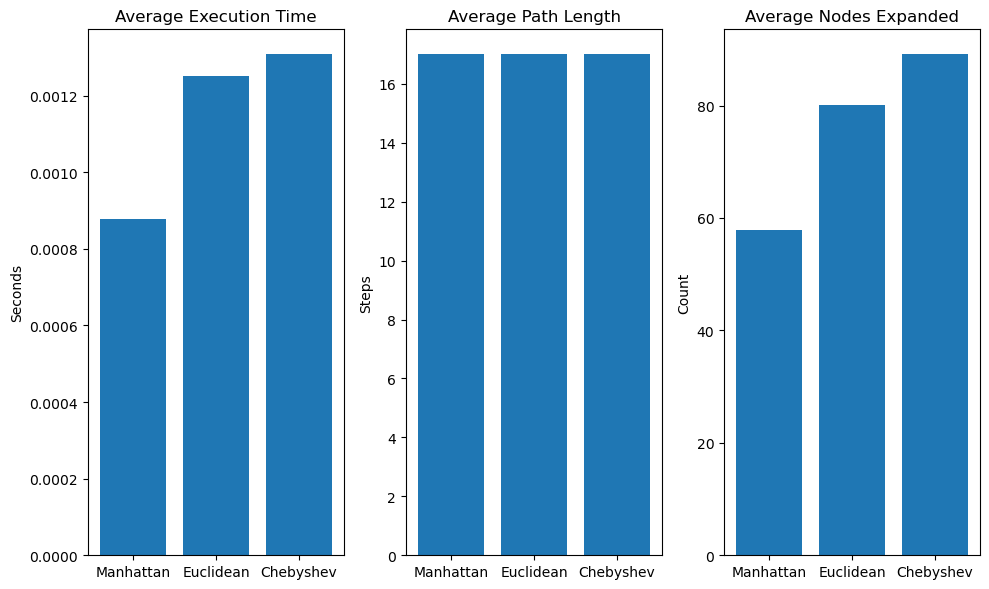

In [6]:
import time
import matplotlib.pyplot as plt

# Function to run experiments
def run_experiment(num_runs=10):
    heuristics = {
        "Manhattan": manhattan,
        "Euclidean": euclidean,
        "Chebyshev": chebyshev
    }
    
    results = {h: {"time": [], "path_len": [], "nodes": []} for h in heuristics}

    for run in range(num_runs):
        grid, start, goal = generate_grid()
        for name, heuristic in heuristics.items():
            start_time = time.time()
            open_set = []
            heapq.heappush(open_set, (0, start))
            came_from = {}
            g_score = {start: 0}
            nodes_expanded = 0

            while open_set:
                _, current = heapq.heappop(open_set)
                nodes_expanded += 1
                if current == goal:
                    path = []
                    while current in came_from:
                        path.append(current)
                        current = came_from[current]
                    path.append(start)
                    path.reverse()
                    break

                for dx, dy in DIRS:
                    neighbor = (current[0] + dx, current[1] + dy)
                    if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
                        if grid[neighbor] == 1:
                            continue
                        tentative_g = g_score[current] + 1
                        if neighbor not in g_score or tentative_g < g_score[neighbor]:
                            came_from[neighbor] = current
                            g_score[neighbor] = tentative_g
                            f_score = tentative_g + heuristic(neighbor, goal)
                            heapq.heappush(open_set, (f_score, neighbor))
            else:
                path = None

            end_time = time.time()
            results[name]["time"].append(end_time - start_time)
            results[name]["path_len"].append(len(path) if path else np.nan)
            results[name]["nodes"].append(nodes_expanded)

    # Compute averages
    avg_results = {
        h: {
            "time": np.nanmean(v["time"]),
            "path_len": np.nanmean(v["path_len"]),
            "nodes": np.nanmean(v["nodes"])
        }
        for h, v in results.items()
    }

    return avg_results

# Run experiment
avg_results = run_experiment(num_runs=20)

# Display averages
for h, metrics in avg_results.items():
    print(f"\nHeuristic: {h}")
    print(f"  Avg Time (s): {metrics['time']:.5f}")
    print(f"  Avg Path Length: {metrics['path_len']:.2f}")
    print(f"  Avg Nodes Expanded: {metrics['nodes']:.2f}")

# ---- Plot graphs ----
heuristics = list(avg_results.keys())
times = [avg_results[h]['time'] for h in heuristics]
paths = [avg_results[h]['path_len'] for h in heuristics]
nodes = [avg_results[h]['nodes'] for h in heuristics]

plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.bar(heuristics, times)
plt.title("Average Execution Time")
plt.ylabel("Seconds")

plt.subplot(1,3,2)
plt.bar(heuristics, paths)
plt.title("Average Path Length")
plt.ylabel("Steps")

plt.subplot(1,3,3)
plt.bar(heuristics, nodes)
plt.title("Average Nodes Expanded")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [7]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


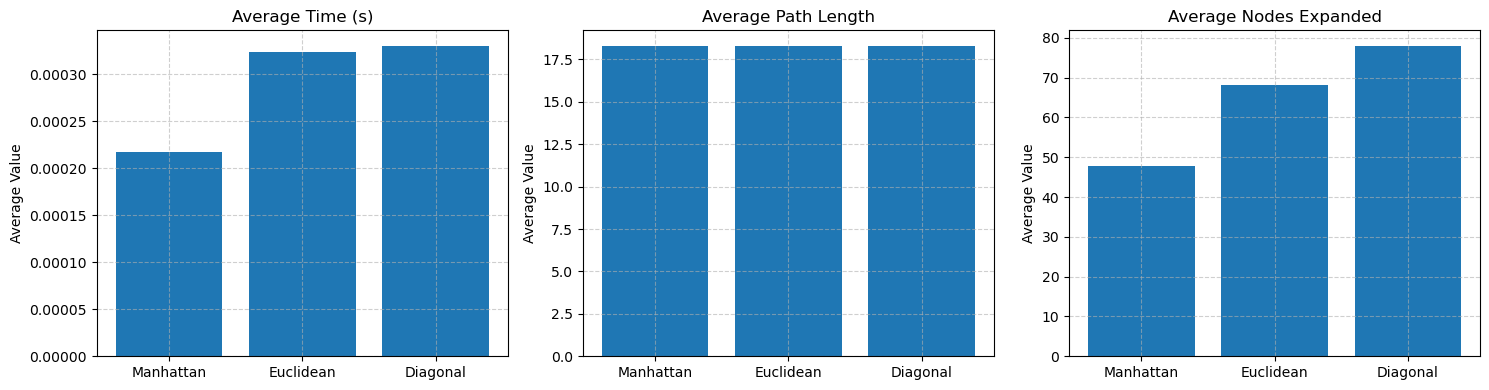

In [8]:
import random
import math
import heapq
import matplotlib.pyplot as plt
import time

# --- GRID SETUP ---
GRID_SIZE = 20
OBSTACLE_PERCENT = 0.25  # 25% obstacles

def generate_grid():
    grid = [[0 for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if random.random() < OBSTACLE_PERCENT:
                grid[i][j] = 1
    start = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
    goal = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
    grid[start[0]][start[1]] = 0
    grid[goal[0]][goal[1]] = 0
    return grid, start, goal

# --- A* SEARCH IMPLEMENTATION ---
def astar(grid, start, goal, heuristic):
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    g_score = {start: 0}
    nodes_expanded = 0

    while open_list:
        _, current = heapq.heappop(open_list)
        nodes_expanded += 1
        if current == goal:
            return reconstruct_path(came_from, current), nodes_expanded

        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < GRID_SIZE and 0 <= neighbor[1] < GRID_SIZE and grid[neighbor[0]][neighbor[1]] == 0:
                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f = tentative_g + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f, neighbor))

    return None, nodes_expanded  # no path

def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    total_path.reverse()
    return total_path

# --- HEURISTICS ---
def manhattan(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

def euclidean(a, b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def diagonal(a, b):
    dx = abs(a[0]-b[0])
    dy = abs(a[1]-b[1])
    return max(dx, dy)

# --- PERFORMANCE TEST ---
def run_experiments(trials=20):
    heuristics = {
        "Manhattan": manhattan,
        "Euclidean": euclidean,
        "Diagonal": diagonal
    }

    results = {h: {"time": [], "length": [], "nodes": []} for h in heuristics}

    for _ in range(trials):
        grid, start, goal = generate_grid()
        for name, func in heuristics.items():
            start_time = time.time()
            path, nodes = astar(grid, start, goal, func)
            end_time = time.time()

            results[name]["time"].append(end_time - start_time)
            results[name]["length"].append(len(path) if path else GRID_SIZE*GRID_SIZE)
            results[name]["nodes"].append(nodes)

    return results

# --- GRAPH PLOTTING ---
def plot_results(results):
    heuristics = list(results.keys())
    avg_time = [sum(results[h]["time"]) / len(results[h]["time"]) for h in heuristics]
    avg_length = [sum(results[h]["length"]) / len(results[h]["length"]) for h in heuristics]
    avg_nodes = [sum(results[h]["nodes"]) / len(results[h]["nodes"]) for h in heuristics]

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    axes[0].bar(heuristics, avg_time)
    axes[0].set_title("Average Time (s)")
    axes[1].bar(heuristics, avg_length)
    axes[1].set_title("Average Path Length")
    axes[2].bar(heuristics, avg_nodes)
    axes[2].set_title("Average Nodes Expanded")

    for ax in axes:
        ax.set_ylabel("Average Value")
        ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

# --- MAIN EXECUTION ---
results = run_experiments(trials=30)
plot_results(results)
